# Random Graph Models

This tutorial will introduce the following random graph models: 
 - Erdos-Reyni (ER)
 - Degree-corrected Erdos-Reyni (DCER)
 - Stochastic block model (SBM)
 - Degree-corrected stochastic block model (DCSBM)
 - Random dot product graph (RDPG)

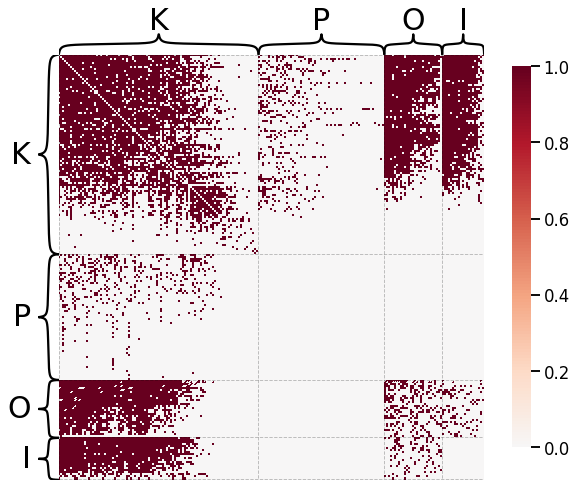

In [1]:
import numpy as np 
from graspy.datasets import load_drosophila_right
from graspy.plot import heatmap
from graspy.utils import binarize, symmetrize
%matplotlib inline
adj, labels = load_drosophila_right(return_labels=True)
adj = symmetrize(adj, method='avg')
adj = binarize(adj)
heatmap(adj, inner_hier_labels=labels, transform='simple-nonzero');

# Erdos-Reyni
The Erdos-Reyni (ER) model is the simplest random graph model one could write down. We are interested in modeling the probability of an edge existing between any two nodes, $i$ and $j$. We denote this probability $P_{ij}$. For the ER model:

$$P_{ij} = p$$

for any combination of $i$ and $j$

This means that the one parameter $p$ is the overall probability of connection for any two nodes. 

ER "p" parameter: 0.2479666732791113


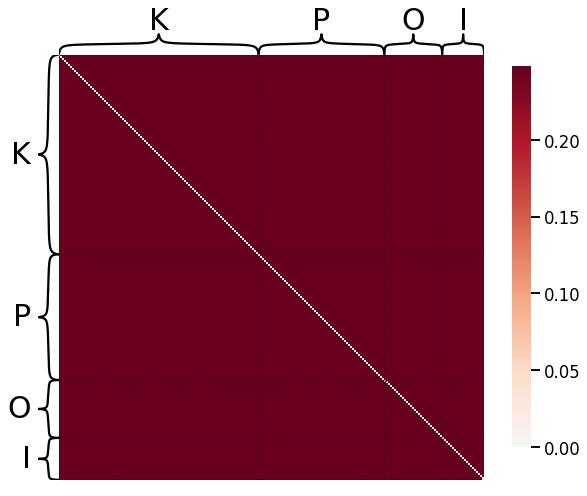

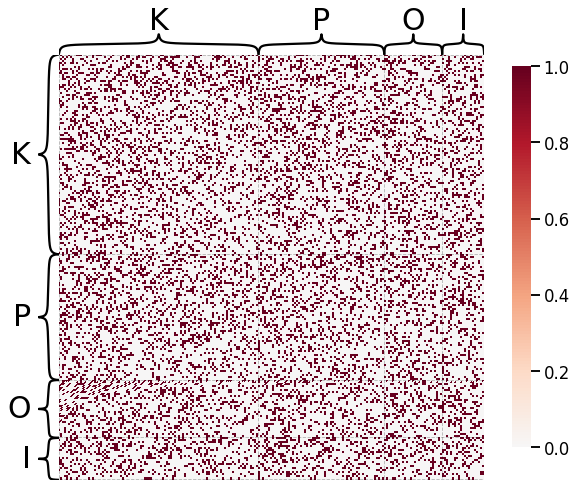

In [2]:
from graspy.models import EREstimator
er = EREstimator(directed=True,loops=False)
er.fit(adj)
print(f"ER \"p\" parameter: {er.p_}")
heatmap(er.p_mat_, inner_hier_labels=labels,)
heatmap(er.sample()[0], inner_hier_labels=labels,);

# Degree-corrected Erdos-Reyni

A slightly more complicated variant of the ER model is the degree-corrected Erdos-Reyni model (DCER). Here, there is still a global parameter $p$ to specify relative connection probability between all edges. However, we add a promiscuity parameter $\theta_i$ for each node $i$ which specifies its expected degree relative to other nodes:

$$P_{ij} = \theta_i \theta_j p$$

so the probility of an edge from $i$ to $j$ is a function of the two nodes' degree-correction parameters, and the overall probability of an edge in the graph. 

ER "p" parameter: 11250.0


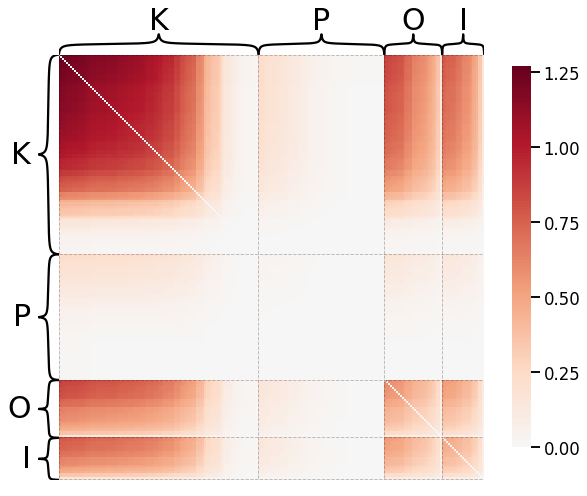

In [3]:
from graspy.models import DCEREstimator
dcer = DCEREstimator(directed=True,loops=False)
dcer.fit(adj)
print(f"ER \"p\" parameter: {dcer.p_}")
heatmap(dcer.p_mat_, inner_hier_labels=labels,);
# heatmap(dcer.sample()[0], inner_hier_labels=labels,);

# Stochastic block model

SBM "B" matrix:
[[0.         0.53238095 0.17077176 0.        ]
 [0.53238095 0.4714     0.49448276 0.07587302]
 [0.17077176 0.49448276 0.31866825 0.        ]
 [0.         0.07587302 0.         0.        ]]


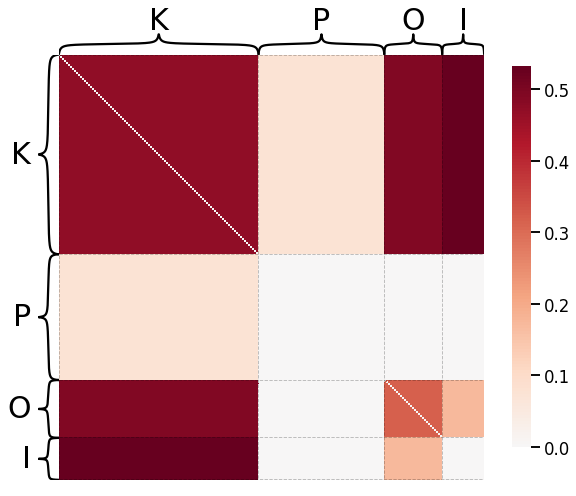

In [4]:
from graspy.models import SBEstimator
sbe = SBEstimator(directed=True,loops=False)
sbe.fit(adj, y=labels)
print("SBM \"B\" matrix:")
print(sbe.block_p_)
heatmap(sbe.p_mat_, inner_hier_labels=labels,);

# Degree-corrected stochastic block model

DCSBM "B" matrix:
[[   0. 1118.  104.    0.]
 [1118. 4714. 1434.  478.]
 [ 104. 1434.  268.    0.]
 [   0.  478.    0.    0.]]


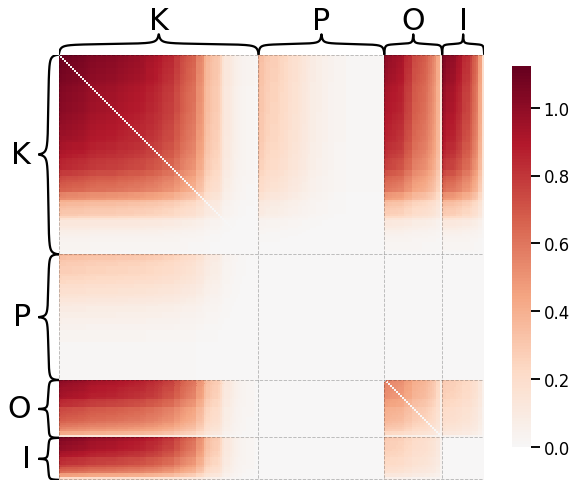

In [5]:
from graspy.models import DCSBEstimator
dcsbe = DCSBEstimator(directed=True,loops=False)
dcsbe.fit(adj, y=labels)
print("DCSBM \"B\" matrix:")
print(dcsbe.block_p_)
heatmap(dcsbe.p_mat_, inner_hier_labels=labels,);

# Random dot product graph

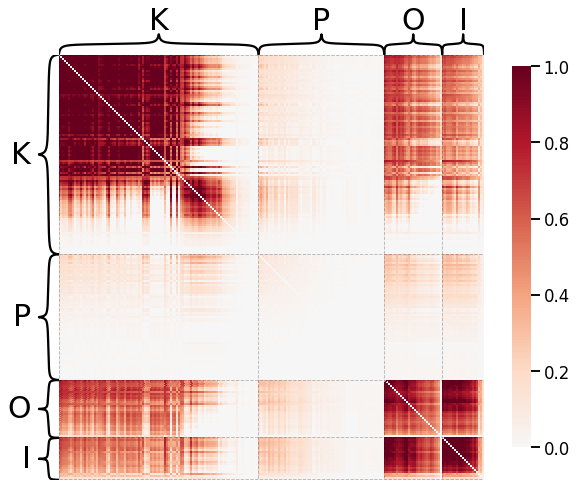

In [7]:
from graspy.models import RDPGEstimator
rdpge = RDPGEstimator(loops=False)
rdpge.fit(adj, y=labels)
heatmap(rdpge.p_mat_, inner_hier_labels=labels,);